# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime as dt
from scipy.stats import linregress

import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | i-n-salah
Processing Record 3 of Set 1 | lauro de freitas
Processing Record 4 of Set 1 | staryye ozinki
Processing Record 5 of Set 1 | tual
Processing Record 6 of Set 1 | rio claro
Processing Record 7 of Set 1 | preobrazheniye
Processing Record 8 of Set 1 | cabedelo
Processing Record 9 of Set 1 | margate
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | pangody
Processing Record 14 of Set 1 | yarmouth
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | elverum
Processing Record 20 of Set 1 | pangoa
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | wot

Processing Record 41 of Set 4 | usogorsk
Processing Record 42 of Set 4 | mount pearl
Processing Record 43 of Set 4 | bhowali
Processing Record 44 of Set 4 | remire-montjoly
Processing Record 45 of Set 4 | puerto ayora
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | sinjai
Processing Record 48 of Set 4 | mili
Processing Record 49 of Set 4 | qaqortoq
Processing Record 0 of Set 5 | minas de marcona
Processing Record 1 of Set 5 | mukalla
Processing Record 2 of Set 5 | uturoa
Processing Record 3 of Set 5 | melfi
Processing Record 4 of Set 5 | victorica
Processing Record 5 of Set 5 | kahna nau
Processing Record 6 of Set 5 | cable beach
City not found. Skipping...
Processing Record 7 of Set 5 | zuwarah
Processing Record 8 of Set 5 | isna
Processing Record 9 of Set 5 | nantucket
Processing Record 10 of Set 5 | port alfred
Processing Record 11 of Set 5 | wad rawah
Processing Record 12 of Set 5 | amursk
Processing Record 13 of Set 5 | cambridge
Processing Record 14 of Set

Processing Record 33 of Set 8 | brookings
Processing Record 34 of Set 8 | lossiemouth
Processing Record 35 of Set 8 | ariquemes
Processing Record 36 of Set 8 | kwang binh
Processing Record 37 of Set 8 | pudasjarvi
Processing Record 38 of Set 8 | kitaibaraki
Processing Record 39 of Set 8 | yamada
Processing Record 40 of Set 8 | crieff
Processing Record 41 of Set 8 | ust'-ilimsk
Processing Record 42 of Set 8 | dalandzadgad
Processing Record 43 of Set 8 | vilyuchinsk
Processing Record 44 of Set 8 | sao cristovao
Processing Record 45 of Set 8 | revda
Processing Record 46 of Set 8 | saint-joseph
Processing Record 47 of Set 8 | toga village
City not found. Skipping...
Processing Record 48 of Set 8 | hanumangarh
Processing Record 49 of Set 8 | hustopece
Processing Record 0 of Set 9 | callao
Processing Record 1 of Set 9 | hadibu
Processing Record 2 of Set 9 | inhambane
Processing Record 3 of Set 9 | tofol
Processing Record 4 of Set 9 | axim
Processing Record 5 of Set 9 | giyani
Processing Reco

Processing Record 21 of Set 12 | botou
Processing Record 22 of Set 12 | aldinga beach
Processing Record 23 of Set 12 | tazacorte
Processing Record 24 of Set 12 | crookston
Processing Record 25 of Set 12 | cafayate
Processing Record 26 of Set 12 | kuta
Processing Record 27 of Set 12 | comodoro rivadavia
Processing Record 28 of Set 12 | gorlice
Processing Record 29 of Set 12 | fort bragg
Processing Record 30 of Set 12 | kataba
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | sumenep
Processing Record 33 of Set 12 | bel ombre
Processing Record 34 of Set 12 | viedma
Processing Record 35 of Set 12 | bhamo
Processing Record 36 of Set 12 | turuntayevo
Processing Record 37 of Set 12 | ljusdal
Processing Record 38 of Set 12 | ocos
Processing Record 39 of Set 12 | jaguaribe
Processing Record 40 of Set 12 | taltal
Processing Record 41 of Set 12 | gandai
Processing Record 42 of Set 12 | motueka
Processing Record 43 of Set 12 | korla
Processing Record 44 of Set 12 | puerto rea

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.83,84,86,5.51,PN,1682879555
1,i-n-salah,27.1935,2.4607,34.45,8,84,2.80,DZ,1682879555
2,lauro de freitas,-12.8944,-38.3272,29.01,74,75,5.14,BR,1682879555
3,staryye ozinki,51.1786,49.6769,22.19,43,100,7.77,RU,1682879555
4,tual,-5.6667,132.7500,27.74,78,100,5.08,ID,1682879555


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.83,84,86,5.51,PN,1682879555
1,i-n-salah,27.1935,2.4607,34.45,8,84,2.80,DZ,1682879555
2,lauro de freitas,-12.8944,-38.3272,29.01,74,75,5.14,BR,1682879555
3,staryye ozinki,51.1786,49.6769,22.19,43,100,7.77,RU,1682879555
4,tual,-5.6667,132.7500,27.74,78,100,5.08,ID,1682879555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

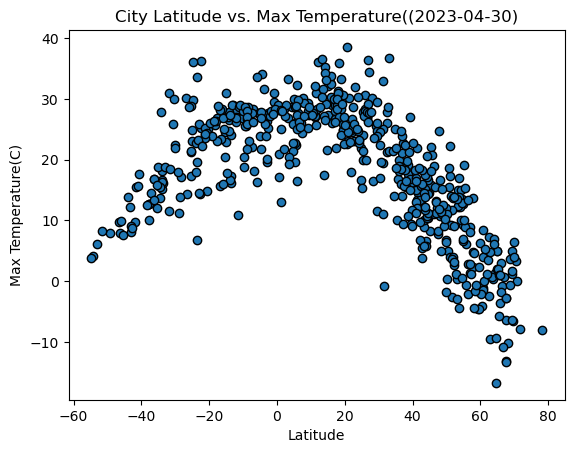

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat']
           ,city_data_df['Max Temp']
           ,edgecolors='black'
           )
    
# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature(('+dt.fromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

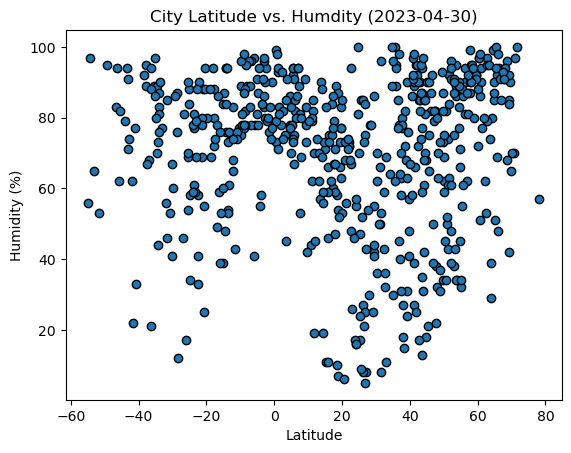

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat']
           ,city_data_df['Humidity'] 
           ,edgecolors='black'
           )

# Incorporate the other graph properties
plt.title('City Latitude vs. Humdity ('+dt.fromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

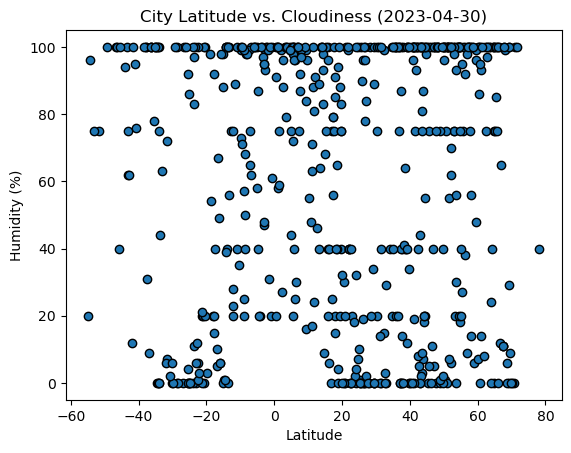

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat']
           ,city_data_df['Cloudiness'] 
           ,edgecolors='black'
           )

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ('+dt.fromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

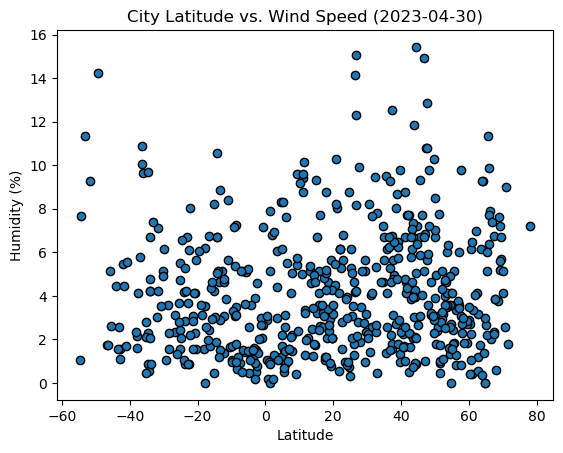

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat']
           ,city_data_df['Wind Speed'] 
           ,edgecolors='black'
           )

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ('+dt.fromtimestamp(city_data_df.loc[0,'Date']).strftime('%Y-%m-%d')+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plots (x_values
                            ,y_values):
                            #,title
                            #,x_label
                            #,y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = y ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values
               ,y_values
               ,edgecolors='black'
               )

    plt.plot(x_values, regress_values, 'r-')
    
    return(plt, line_eq)

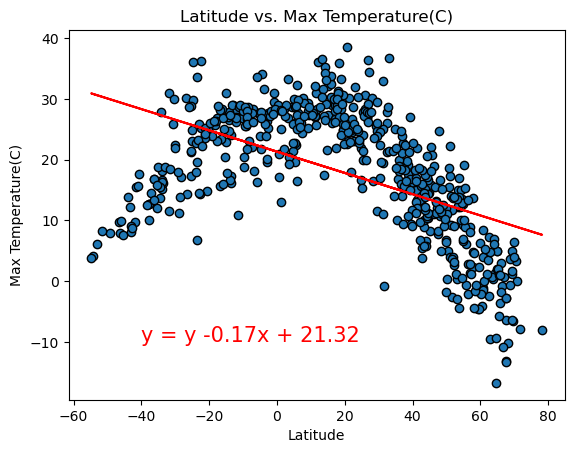

In [16]:
#Function Test
plot, line_eq = linear_regression_plots(city_data_df['Lat']
                                       ,city_data_df['Max Temp']
                                       )

plot.annotate(line_eq,(-40,-10),fontsize=15, color='red')
plot.title('Latitude vs. Max Temperature(C)')
plot.xlabel('Latitude')
plot.ylabel('Max Temperature(C)')
    
plot.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,i-n-salah,27.1935,2.4607,34.45,8,84,2.80,DZ,1682879555
3,staryye ozinki,51.1786,49.6769,22.19,43,100,7.77,RU,1682879555
6,preobrazheniye,42.9019,133.9064,3.80,90,44,3.85,RU,1682879556
8,margate,51.3813,1.3862,14.06,74,100,0.45,GB,1682879386
9,longyearbyen,78.2186,15.6401,-8.09,57,40,7.20,SJ,1682879556


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.83,84,86,5.51,PN,1682879555
2,lauro de freitas,-12.8944,-38.3272,29.01,74,75,5.14,BR,1682879555
4,tual,-5.6667,132.7500,27.74,78,100,5.08,ID,1682879555
5,rio claro,-22.4114,-47.5614,25.28,58,6,0.87,BR,1682879556
7,cabedelo,-6.9811,-34.8339,28.37,78,62,5.16,BR,1682879556


###  Temperature vs. Latitude Linear Regression Plot

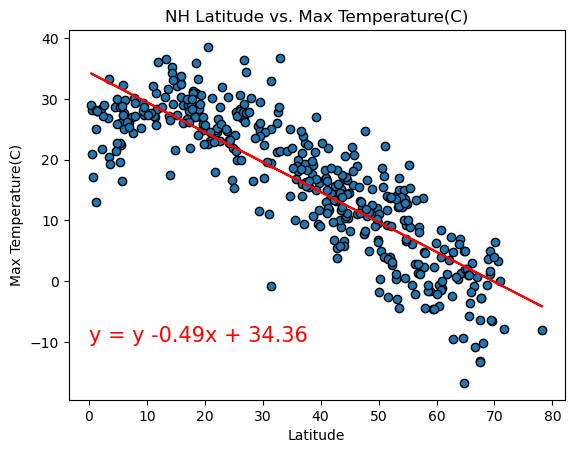

In [21]:
# Linear regression on Northern Hemisphere
plot, line_eq = linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plot.annotate(line_eq,(0,-10),fontsize=15, color='red')
plot.title('NH Latitude vs. Max Temperature(C)')
plot.xlabel('Latitude')
plot.ylabel('Max Temperature(C)')

plot.show()

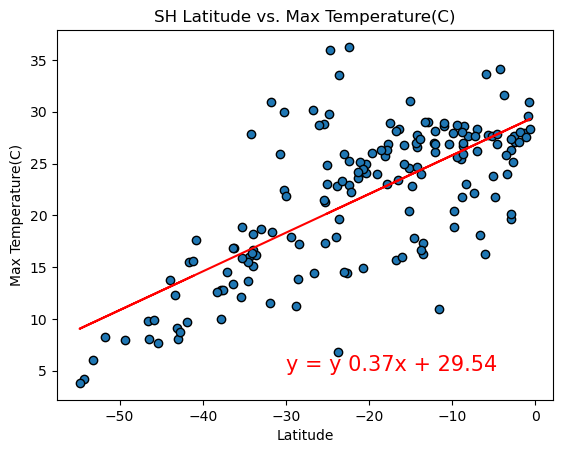

In [22]:
# Linear regression on Southern Hemisphere
plot, line_eq = linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plot.annotate(line_eq,(-30,5),fontsize=15, color='red')
plot.title('SH Latitude vs. Max Temperature(C)')
plot.xlabel('Latitude')
plot.ylabel('Max Temperature(C)')

plot.show()

**Discussion about the linear relationship:** This plot starts in the southern hemisphere and continues to the equater. One thing to note is that the maximum temperature does not happen at the equater (Latitude 0), but happens between the latitude corordinates of -20 and -30. Solving for Latitude of 0 gives us a maximum temperature of 29.54 C.      

### Humidity vs. Latitude Linear Regression Plot

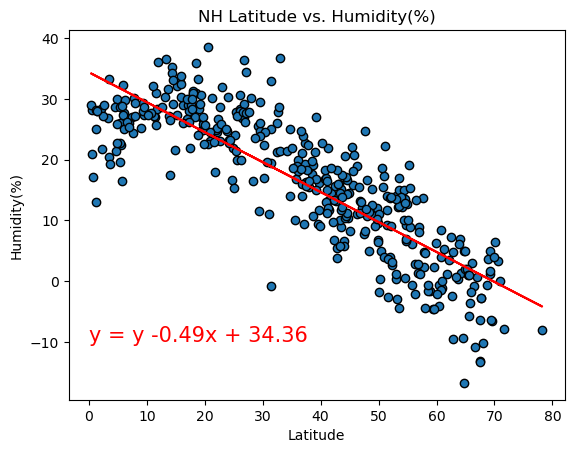

In [24]:
# Northern Hemisphere
plot, line_eq = linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plot.annotate(line_eq,(0,-10),fontsize=15, color='red')
plot.title('NH Latitude vs. Humidity(%)')
plot.xlabel('Latitude')
plot.ylabel('Humidity(%)')

plot.show()

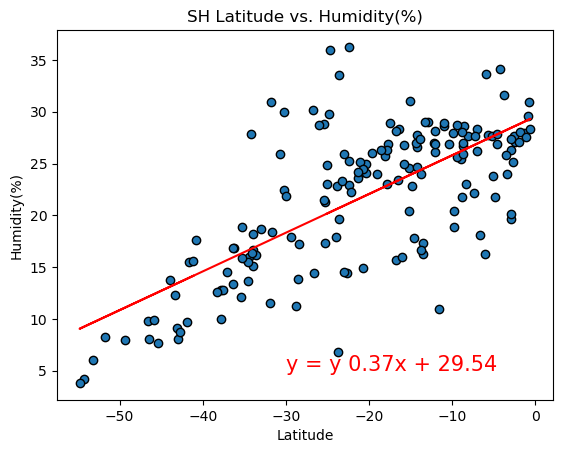

In [25]:
# Southern Hemisphere
plot, line_eq = linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plot.annotate(line_eq,(-30,5),fontsize=15, color='red')
plot.title('SH Latitude vs. Humidity(%)')
plot.xlabel('Latitude')
plot.ylabel('Humidity(%)')

plot.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

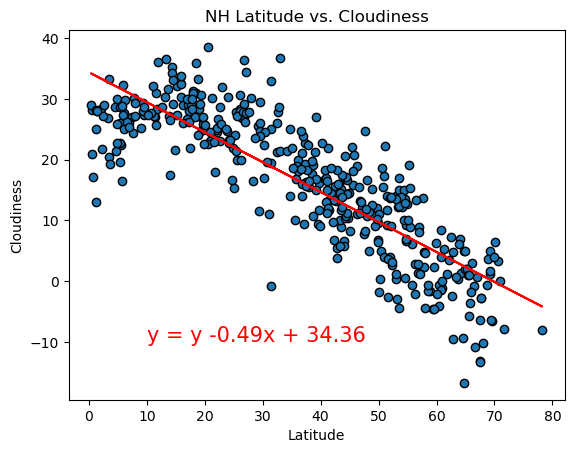

In [27]:
# Northern Hemisphere
plot, line_eq = linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

plot.annotate(line_eq,(10,-10),fontsize=15, color='red')
plot.title('NH Latitude vs. Cloudiness')
plot.xlabel('Latitude')
plot.ylabel('Cloudiness')

plot.show()

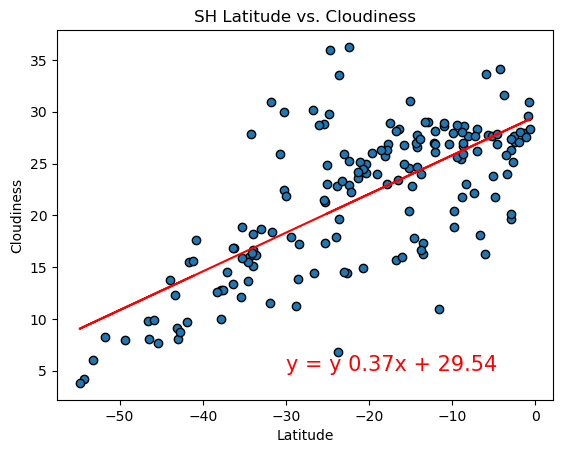

In [28]:
# Southern Hemisphere
plot, line_eq = linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plot.annotate(line_eq,(-30,5),fontsize=15, color='red')
plot.title('SH Latitude vs. Cloudiness')
plot.xlabel('Latitude')
plot.ylabel('Cloudiness')

plot.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

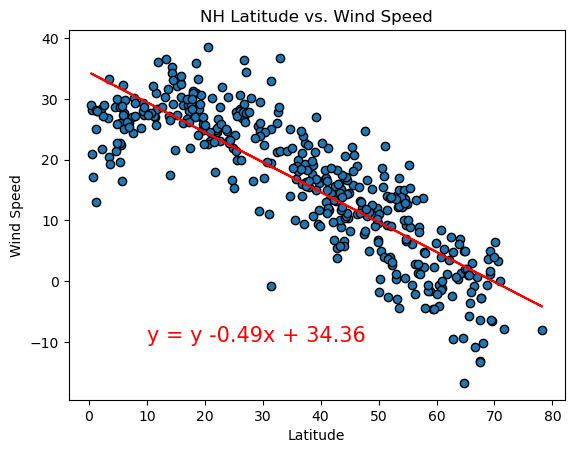

In [30]:
# Northern Hemisphere
plot, line_eq = linear_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plot.annotate(line_eq,(10,-10),fontsize=15, color='red')
plot.title('NH Latitude vs. Wind Speed')
plot.xlabel('Latitude')
plot.ylabel('Wind Speed')

plot.show()

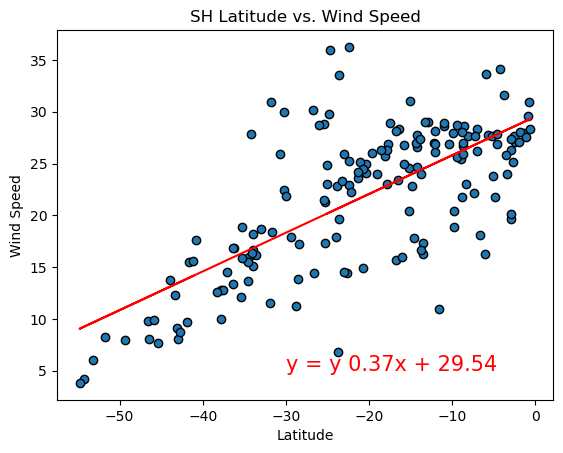

In [31]:
# Southern Hemisphere
plot, line_eq = linear_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plot.annotate(line_eq,(-30,5),fontsize=15, color='red')
plot.title('SH Latitude vs. Wind Speed')
plot.xlabel('Latitude')
plot.ylabel('Wind Speed')

plot.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE